In [221]:
import pandas as pd

In [222]:
df=pd.read_excel('./stl.xlsx')

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [224]:
df.drop('File Name',axis=1,inplace=True)

In [225]:
df

,X,Y,Z,V,SA,ZSA,XY,EV,PrintTime
0,10.850,24.504,28.903,534.080,685.664,1.981757e+04,265.870,7684.364,12.250
1,114.927,114.764,203.047,521494.127,56594.402,1.149130e+07,13189.478,2678077.464,395.333
2,26.000,22.496,30.000,6738.644,2607.366,7.822099e+04,584.898,17546.944,25.533
3,13.856,12.000,30.000,1575.259,1215.058,3.645173e+04,166.277,4988.304,15.800
4,13.101,13.097,30.000,1315.144,1191.881,3.575643e+04,171.587,5147.624,16.017
...,...,...,...,...,...,...,...,...,...
3061,129.869,121.130,176.000,1226886.285,76504.414,1.346478e+07,15730.932,2768644.108,593.117
3062,110.149,106.421,180.000,554016.194,59480.078,1.070641e+07,11722.221,2109999.703,338.683
3063,128.450,129.157,180.000,1422953.670,82588.125,1.486586e+07,16590.165,2986229.649,673.133
3064,300.224,131.252,74.404,297559.876,40098.500,2.983470e+06,39404.821,2931857.662,431.300


In [226]:
correlation_matrix = np.corrcoef(df, rowvar=False)

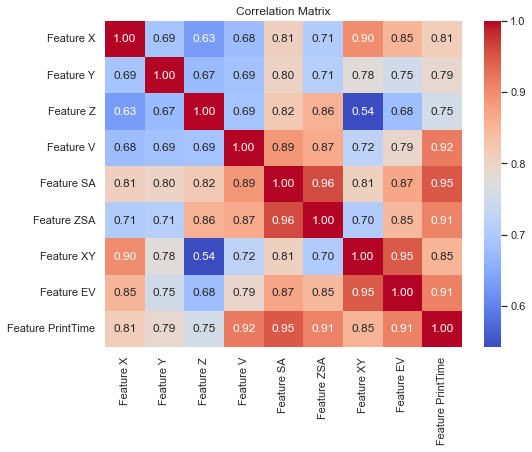

In [227]:
sns.set(style="white")  # 히트맵 스타일 설정
plt.figure(figsize=(8, 6))  # 플롯 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=[f"Feature {df.columns[i]}" for i in range(df.shape[1])],
            yticklabels=[f"Feature {df.columns[i]}" for i in range(df.shape[1])])
plt.title("Correlation Matrix")
plt.show()

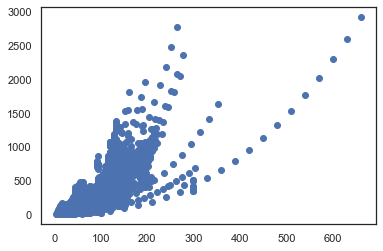

In [228]:
plt.scatter(df['X'],df['PrintTime'])

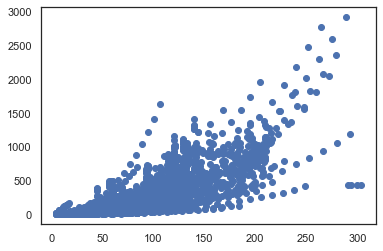

In [229]:
plt.scatter(df['Y'],df['PrintTime'])

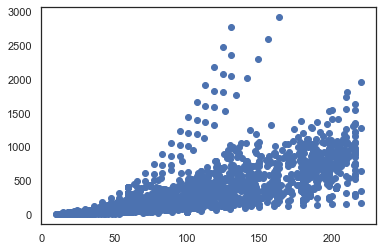

In [230]:
plt.scatter(df['Z'],df['PrintTime'])

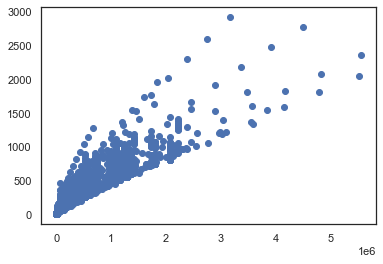

In [231]:
plt.scatter(df['V'],df['PrintTime'])

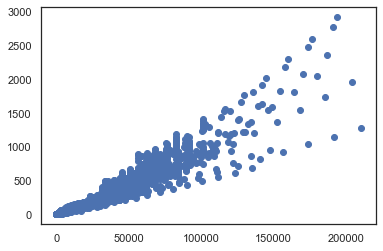

In [232]:
plt.scatter(df['SA'],df['PrintTime'])

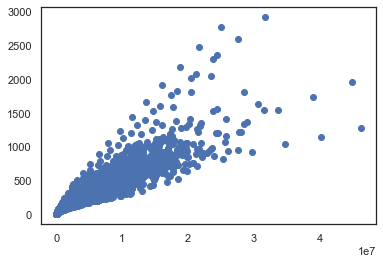

In [233]:
plt.scatter(df['ZSA'],df['PrintTime'])

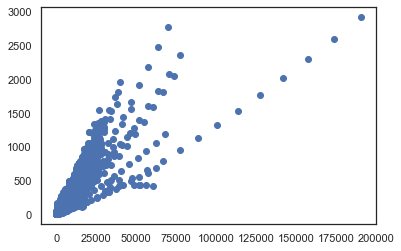

In [234]:
plt.scatter(df['XY'],df['PrintTime'])

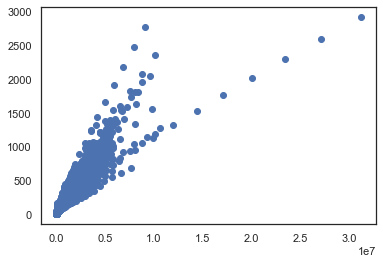

In [235]:
plt.scatter(df['EV'],df['PrintTime'])

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [248]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

# 데이터 로더 정의
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

In [240]:
Algorithm='ANN'

In [241]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [242]:
# 모델, 손실 함수, 최적화기 설정
input_size = 8
hidden_size = 4
output_size = 1

In [243]:
model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
history=[]
total_loss=0

In [246]:
epochs = 100000
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/100000], Loss: 89736.6797
Epoch [200/100000], Loss: 129027.2891
Epoch [300/100000], Loss: 106894.5234
Epoch [400/100000], Loss: 79835.2891
Epoch [500/100000], Loss: 205048.1250
Epoch [600/100000], Loss: 75893.2734
Epoch [700/100000], Loss: 81270.7031
Epoch [800/100000], Loss: 59266.7188
Epoch [900/100000], Loss: 106297.1094


KeyboardInterrupt: 

In [245]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

model.train()

Test Loss: 93771.6328


C:\Users\LEE\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([614])) that is different to the input size (torch.Size([614, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


SimpleNN(
  (fc1): Linear(in_features=8, out_features=4, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=4, out_features=1, bias=True)
)